In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scikitplot as skplt
import warnings

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_auc_score, recall_score, precision_score
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

warnings.filterwarnings('ignore')


In [2]:
# Membaca dan menyimpan dataset train
df = pd.read_csv('../Dataset/kendaraan_train_clean.csv')
df.sample(5)

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
140871,0.0,0.076923,1.0,0.307692,1.0,0.0,1.0,0.052867,0.932099,0.882353,0
179305,0.0,0.076923,1.0,0.557692,1.0,0.0,0.0,0.049699,0.932099,0.525952,0
189514,1.0,0.630769,1.0,0.538462,0.0,1.0,1.0,0.072019,0.932099,0.543253,0
10644,1.0,0.307692,1.0,0.538462,0.0,1.0,1.0,0.000000,0.154321,0.083045,0
33967,0.0,0.569231,1.0,0.538462,0.0,1.0,1.0,0.070139,0.746914,0.000000,0


In [3]:
# Membaca dan menyimpan dataset test
df_test = pd.read_csv('../Dataset/kendaraan_test_clean.csv')
df_test.sample(5)

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
43950,0,0.107692,1,0.538462,1,0,0,0.055206,0.932099,0.799308,0
33210,0,0.353846,1,0.480769,1,1,0,0.047229,0.932099,0.086505,0
39434,1,0.046154,1,0.826923,1,0,0,0.036554,0.932099,0.795848,0
45331,1,0.630769,1,0.557692,0,2,1,0.000000,0.154321,0.242215,1
20356,0,0.076923,1,0.865385,1,0,0,0.047093,0.932099,0.411765,0


0    250661
1     35001
Name: Tertarik, dtype: int64


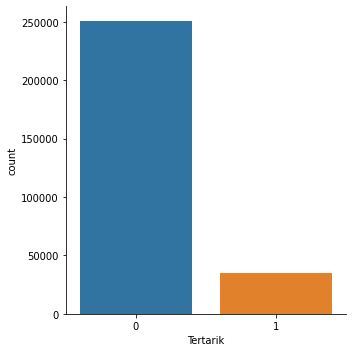

In [4]:
# Mengecek keseimbangan target variable
print(df['Tertarik'].value_counts())
sns.catplot(x='Tertarik', data=df, kind='count')

In [5]:
# Memisahkan antara feature dan target variable
x_data = df.drop("Tertarik", axis=1)
y_data = df["Tertarik"]

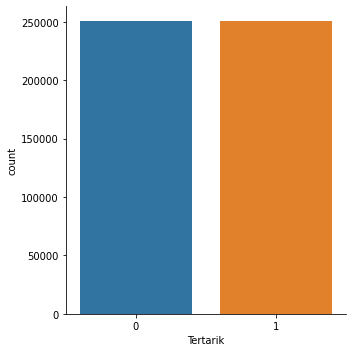

In [6]:
# Melakukan Oversampling untuk menyetarakan kelas minoritas (1)
smt = SMOTE(random_state=42, k_neighbors=5)
x_train, y_train = smt.fit_sample(x_data, y_data)

sns.catplot(x='Tertarik', data=pd.DataFrame(y_train), kind='count')

## **Tuning Model**

In [7]:
# Mendefinisikan Array Untuk Algoritma Machine Learning Yang Akan Digunakan
classifier = [
    DecisionTreeClassifier(class_weight='balanced'),
    SGDClassifier(class_weight='balanced', loss="modified_huber", n_jobs=-1),
    GaussianNB(),
    AdaBoostClassifier(),
    RandomForestClassifier(class_weight='balanced', n_jobs=-1),
]

name = [
    'Decision Tree',
    'SGDClassifier',
    'Naive Bayes',
    'AdaBoost',
    'Random Forest',
]

### **Melatih Model Machine Learning**

In [8]:
# Melakukan pelatihan terhadap model yang telah didefinisikan sebelumnya
for models in classifier:
    models.fit(x_train, y_train)

In [9]:
# Mendefinisikan fungsi untuk evaluasi metrik untuk setiap model yang terdiri atas
# Confusion Matrix, ROC Curve, F1 Score, Precision, Recall, Dan Accuracy
def report(model, title, x_test, y_test):
    result = model.predict(x_test)
    conf_matrix = confusion_matrix(y_test, result)

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

    sns.heatmap(conf_matrix, annot=True, xticklabels=[0, 1], yticklabels=[0, 1], cmap='flare', fmt='d', ax=axes[0])
    skplt.metrics.plot_roc(y_test, model.predict_proba(x_test), ax=axes[1])

    axes[0].set_ylabel('Actual')
    axes[0].set_xlabel('Predicted')
    axes[0].set_title(f'Confusion matrix {title}', pad=16)

    plt.show()

    f1 = round(f1_score(y_test, result, average='weighted'), 3)
    recall = round(recall_score(y_test, result), 3)
    precision = round(precision_score(y_test, result), 3)
    roc = round(roc_auc_score(y_test, result), 3)
    accuracy = round(accuracy_score(y_test, result), 3)

    print("F1-Score \t:", f1)
    print("Recall \t\t:", recall)
    print("Precision \t:", precision)
    print("ROC-AUC \t:", roc)
    print("Accuracy \t:", accuracy, end="\n\n")

    return title, f1, recall, precision, roc, accuracy

## **Memprediksi Dan Evaluasi Data Test**

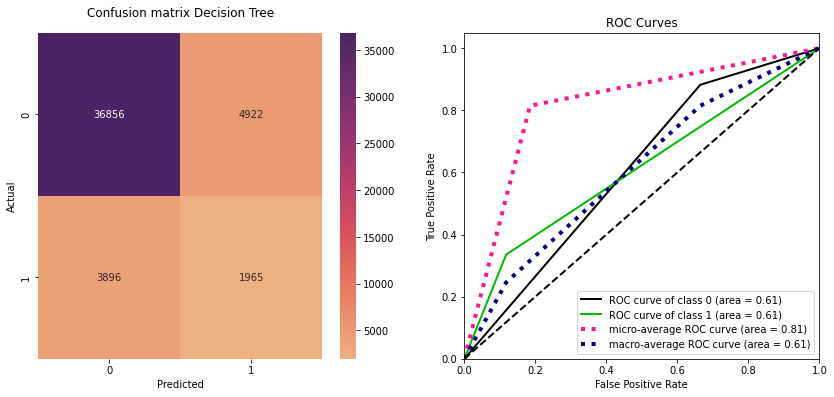

F1-Score 	: 0.821
Recall 		: 0.335
Precision 	: 0.285
ROC-AUC 	: 0.609
Accuracy 	: 0.815



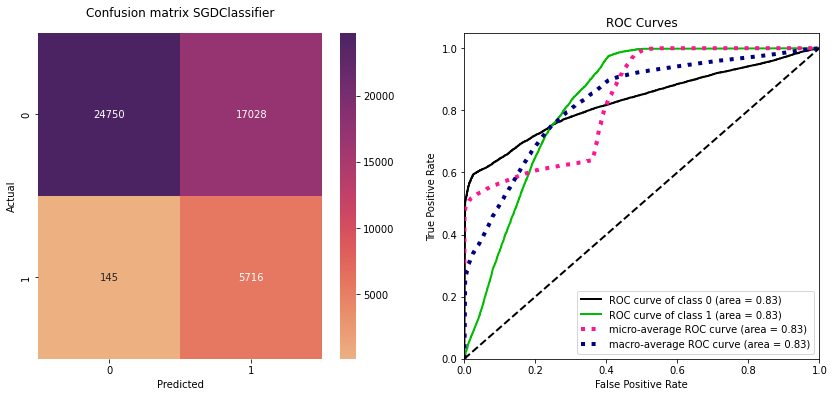

F1-Score 	: 0.7
Recall 		: 0.975
Precision 	: 0.251
ROC-AUC 	: 0.784
Accuracy 	: 0.64



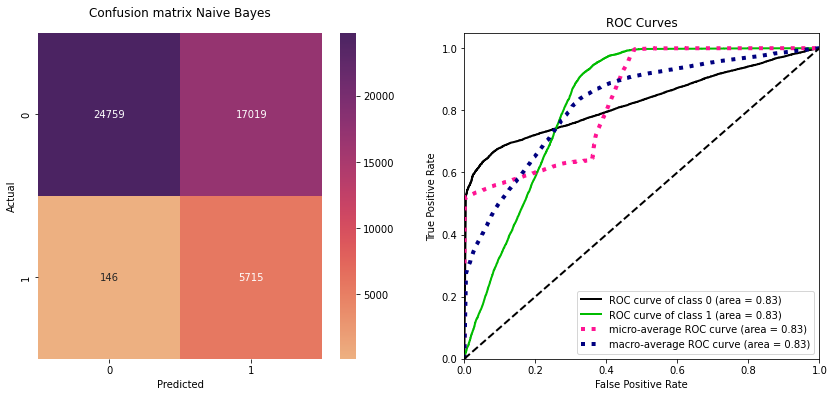

F1-Score 	: 0.7
Recall 		: 0.975
Precision 	: 0.251
ROC-AUC 	: 0.784
Accuracy 	: 0.64



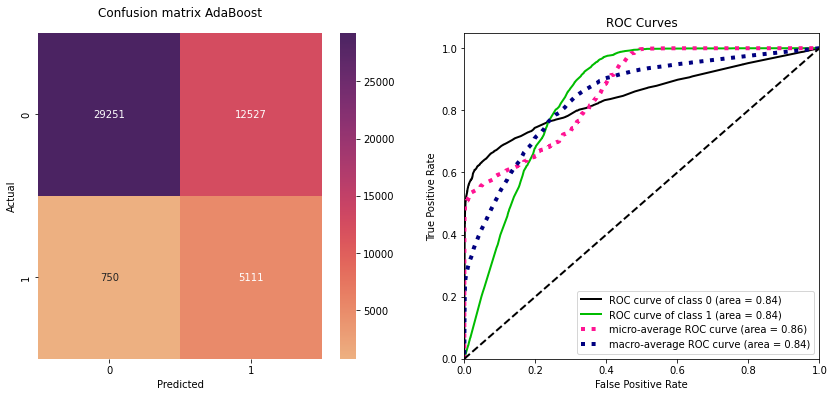

F1-Score 	: 0.768
Recall 		: 0.872
Precision 	: 0.29
ROC-AUC 	: 0.786
Accuracy 	: 0.721



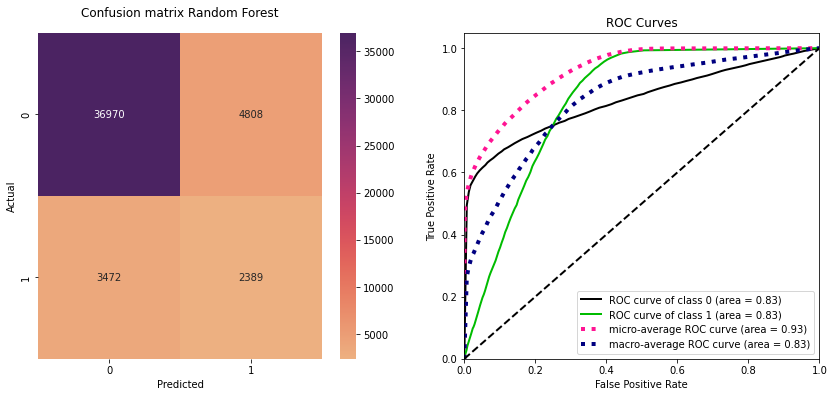

F1-Score 	: 0.834
Recall 		: 0.408
Precision 	: 0.332
ROC-AUC 	: 0.646
Accuracy 	: 0.826



In [10]:
# Memisahkan antara feature dan target variable untuk data test
x_test = df_test.drop("Tertarik", axis=1)
y_test = df_test["Tertarik"]

# Melakukan perulangan untuk menampilkan hasil evaluasi data test setiap model
metrics_report_test = []

for models, i in zip(classifier, name):
    title, f1, recall, precision, roc, accuracy = report(models, i, x_test, y_test)
    metrics_report_test.append([title, f1, recall, precision, roc, accuracy])


### **Jika Menginginkan Prediksi Seimbang Antara True Positive dan True Negative**

In [11]:
metrics_report_test = pd.DataFrame(metrics_report_test, columns=['Model', 'F1-Score', 'Recall', 'Precision', 'ROC-AUC', 'Accuracy'])
metrics_report_test.sort_values(by=['ROC-AUC'], ascending=False)

,Model,F1-Score,Recall,Precision,ROC-AUC,Accuracy
3,AdaBoost,0.768,0.872,0.290,0.786,0.721
1,SGDClassifier,0.700,0.975,0.251,0.784,0.640
2,Naive Bayes,0.700,0.975,0.251,0.784,0.640
4,Random Forest,0.834,0.408,0.332,0.646,0.826
0,Decision Tree,0.821,0.335,0.285,0.609,0.815


### **Jika Lebih Menginginkan Prediksi True Postive**

In [12]:
metrics_report_test = pd.DataFrame(metrics_report_test, columns=['Model', 'F1-Score', 'Recall', 'Precision', 'ROC-AUC', 'Accuracy'])
metrics_report_test.sort_values(by=['Recall'], ascending=False)

,Model,F1-Score,Recall,Precision,ROC-AUC,Accuracy
1,SGDClassifier,0.700,0.975,0.251,0.784,0.640
2,Naive Bayes,0.700,0.975,0.251,0.784,0.640
3,AdaBoost,0.768,0.872,0.290,0.786,0.721
4,Random Forest,0.834,0.408,0.332,0.646,0.826
0,Decision Tree,0.821,0.335,0.285,0.609,0.815
